<a href="https://colab.research.google.com/github/Nighty13/-ALL-CNN-OBJ_REC-/blob/master/OBJECT_RECOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN** For object recognition "Striving For Simplicity : The All Convolutional Net" Paper Link : https://arxiv.org/pdf/1412.6806.pdf

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import PIL.Image

In [85]:
import sys
import keras
print('Python : {}'.format(sys.version))
print('Keras : {}'.format(keras.__version__))

Python : 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Keras : 2.2.4


In [86]:
!git clone https://github.com/PAN001/All-CNN

fatal: destination path 'All-CNN' already exists and is not an empty directory.


In [87]:
!ls All-CNN

all_cnn_best_weights_2.hdf5		  gap.png
all_cnn_best_weights_glorot_uniform.hdf5  LSUV_pseudo_code.png
all_cnn_best_weights_test.hdf5		  LSUV.py
all_cnn_final_weights_2.h5		  LSUV.pyc
all_cnn_final_weights_test.h5		  mnist_cnn.py
all_cnn_history2.csv			  mnist.py
all_cnn_historytest.csv			  next_batch.py
all_cnn_model_0.9011_0.5080.csv		  next_batch.pyc
all_cnn_model_0.9011_0.5080.h5		  plot_acc_loss.py
all_cnn_weights_0.9088_0.4994.hdf5	  read_cifar10.py
exp1_acc.png				  read_cifar10.pyc
exp1_loss.png				  reading
exp2_acc.png				  README.md
exp2_loss.png				  requirements.txt
exp3_acc.png				  shuffle.py
exp3_loss.png				  shuffle.pyc
exp4_acc.png				  strided_all_CNN_keras.py
exp4_loss.png				  strided_all_CNN_tf_LSUV.py
final_model_acc.png


In [0]:
#Load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [89]:
#Lets determine the dataset characteristics 
print('Training Images :{}'.format(X_train.shape))
print('Testing Images :{}'.format(X_test.shape))

Training Images :(50000, 32, 32, 3)
Testing Images :(10000, 32, 32, 3)


In [90]:
# A single images
print(X_train[0].shape)


(32, 32, 3)


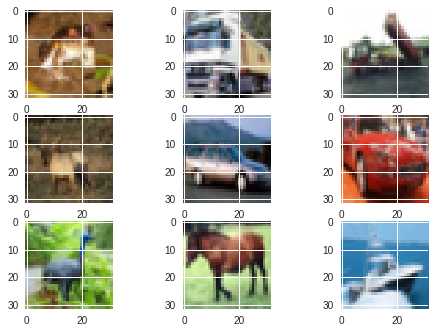

In [91]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)

#show the plot
plt.show()

In [0]:
#Preprocessing the dataset
#fix random seed for reproducibility
seed = 6
np.random.seed(seed)

#load the data
#(X_train,y_train),(X_test,y_test) = cifar10.load_data()

#normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [93]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [94]:
# 6 = [0,0,0,0,0,0,1,0,0,0]
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test= np_utils.to_categorical(y_test)
num_class=Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Building the **ALL CNN**

_________________________________________________

### T**able 1: The three base networks used for classification on CIFAR-10 and CIFAR-100.**

Model **C**
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax
_________________________________________________





In [0]:
# start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [0]:
# define the model function
def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [99]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model and define weights
weights='All-CNN/all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
# epochs = 350
# batch_size = 32
# fit the model : training takes long time :(
# model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)
scores = model.evaluate(X_test,Y_test, verbose=1)
print('Accuracy:{}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_86 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_87 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 16, 16, 192)       166080    
__________

In [101]:
#make dictionary of class labels and names
classes = range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']

#zip the names and classes to make a dictionary of class labels
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [104]:
#generate batch oof 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis = -1)
#make predictions 
predictions = model.predict(batch,verbose=1)
print(predictions)

9/9 [==============================] - 0s 1ms/step
[[4.5647404e-18 1.0580944e-20 1.8923134e-10 2.1411485e-11 9.9999928e-01
  2.8037709e-07 3.1479029e-13 4.2382177e-07 1.3699504e-19 1.2096835e-18]
 [2.1191630e-16 2.0387947e-17 1.5672766e-09 5.3581920e-07 1.6256203e-10
  9.9999940e-01 1.6712586e-09 2.0782505e-08 3.6550979e-15 3.5129402e-16]
 [1.2720516e-30 5.0273257e-28 5.1540610e-24 3.6051960e-21 1.0875389e-27
  8.1523708e-22 1.0000000e+00 1.1050866e-27 6.1924613e-32 1.2273912e-23]
 [1.5143828e-16 4.7667238e-18 2.2583779e-09 1.0000000e+00 4.3480382e-11
  1.6883953e-12 4.5315913e-13 2.6686443e-16 7.2660253e-19 6.2049703e-17]
 [8.2496687e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3555905e-36 8.6863322e-30 8.2188497e-22]
 [5.9702689e-24 1.0000000e+00 7.5488142e-27 8.0230521e-27 1.9714703e-30
  2.7339758e-29 7.2189586e-31 5.5681431e-27 1.6187176e-26 1.1906764e-13]
 [6.4563300e-18 2.9643555e-20 1.0046188e-11 9.9999988e-01 6.0157613e-13
  9.111

In [105]:
#these are class probabilities should sum to 1
for image in predictions:
  print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [107]:
#use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


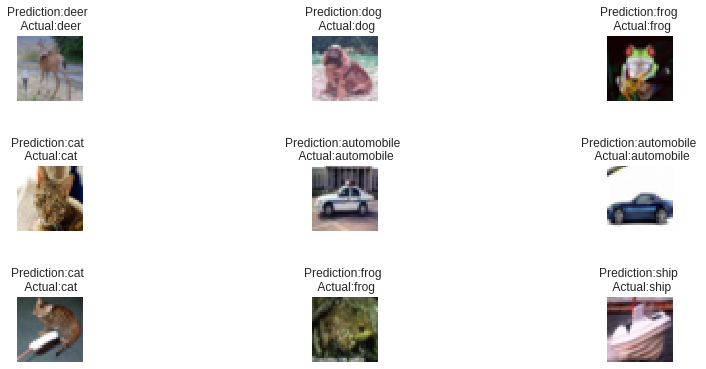

In [109]:
#create a grid of 3x3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i , img in enumerate(batch):
  #determine label for each prediction set title
  for key, value in class_labels.items():
    if class_result[i] == key:
      title='Prediction:{} \n Actual:{}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
   #Plot the image
  axs[i].imshow(img)

plt.show()